In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
%config IPCompleter.greedy=True

In [2]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [3]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')
titanic_features

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [4]:
titanic_features.items()

<generator object DataFrame.items at 0x00000211296192C8>

In [5]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [6]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
numeric_inputs


{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>}

In [7]:
preprocessed_inputs = [all_numeric_inputs]
preprocessed_inputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization')>]

In [8]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = preprocessing.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

In [9]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)



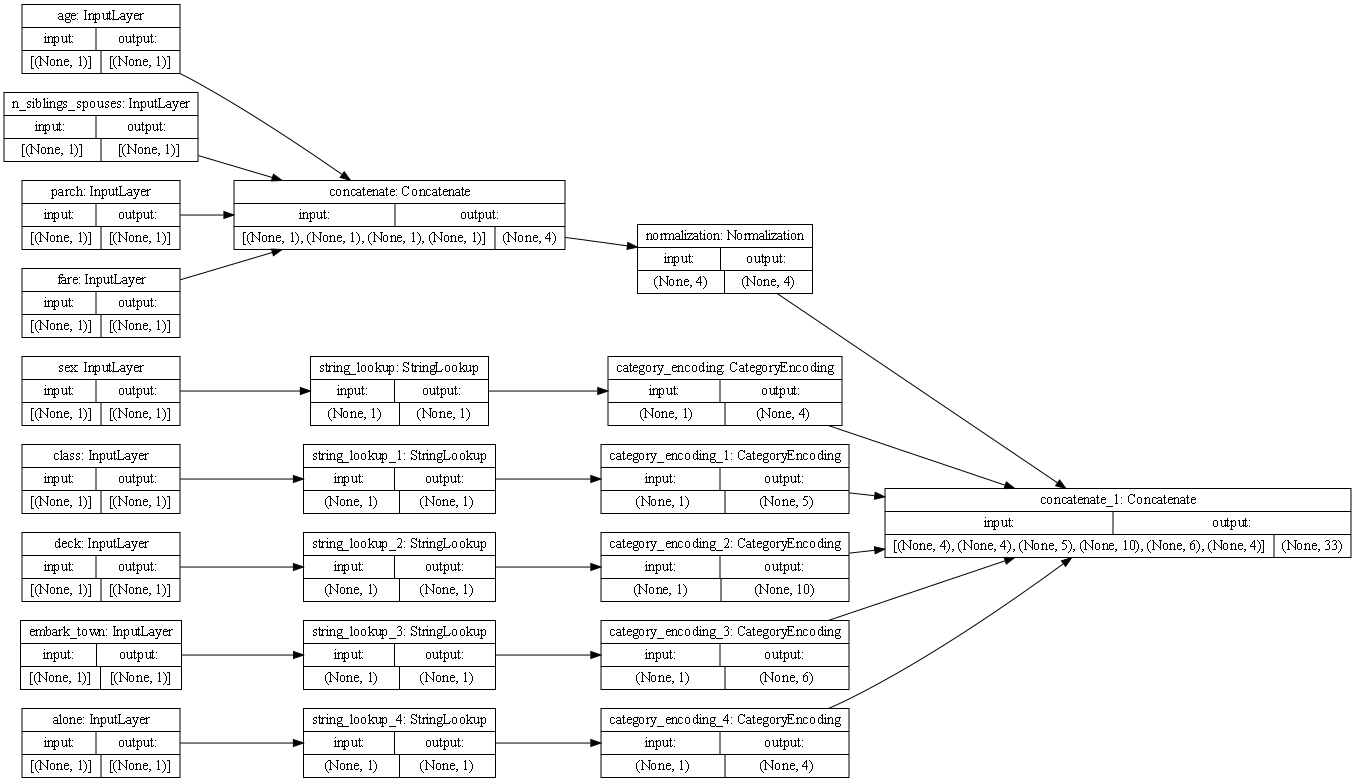

In [10]:
tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [13]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}
titanic_features_dict

{'sex': array(['male', 'female', 'female', 'female', 'male', 'male', 'female',
        'female', 'female', 'male', 'male', 'female', 'male', 'male',
        'female', 'female', 'male', 'male', 'female', 'male', 'male',
        'female', 'male', 'male', 'female', 'female', 'male', 'male',
        'male', 'male', 'female', 'female', 'female', 'male', 'female',
        'male', 'male', 'male', 'female', 'male', 'female', 'female',
        'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male',
        'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
        'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female',
        'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
        'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male',
        'male', 'male', 'male', 'female', 'male', 'female', 'male',
        'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
        'male', 'male', 'male', 'male', 'female',

In [15]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

features_dict

{'sex': array(['male'], dtype=object),
 'age': array([22.]),
 'n_siblings_spouses': array([1], dtype=int64),
 'parch': array([0], dtype=int64),
 'fare': array([7.25]),
 'class': array(['Third'], dtype=object),
 'deck': array(['unknown'], dtype=object),
 'embark_town': array(['Southampton'], dtype=object),
 'alone': array(['n'], dtype=object)}

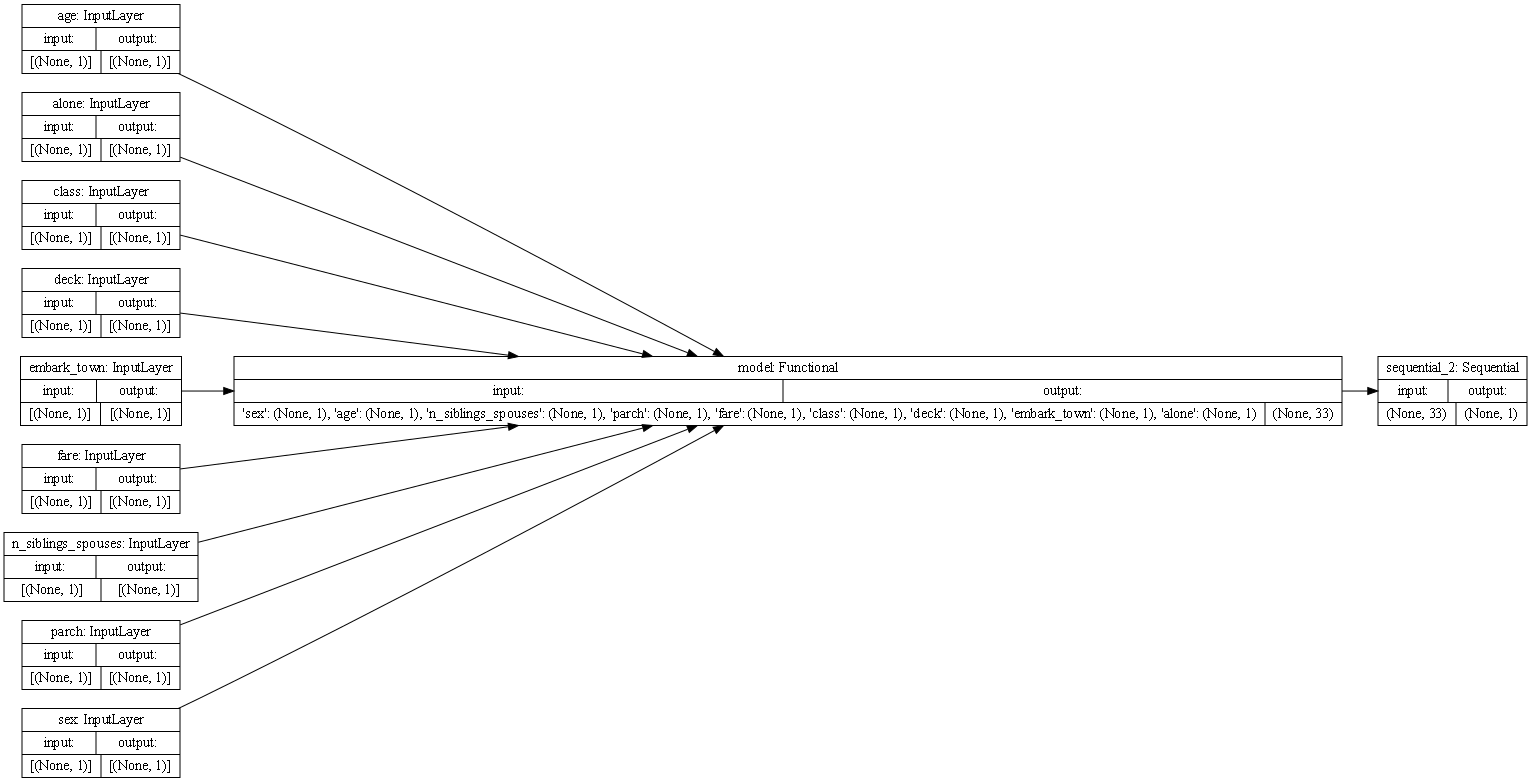

In [18]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

tf.keras.utils.plot_model(model = titanic_model , rankdir="LR", dpi=72, show_shapes=True)

In [19]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 3s 4ms/step - loss: 0.7927
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5893
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5042
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4626
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4557
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4338
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4393
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4554
Epoch 9/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4496
Epoch 10/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4621


In [20]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test\assets


In [28]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(features_dict)
print(before)
print(after)

{'sex': array(['male'], dtype=object), 'age': array([22.]), 'n_siblings_spouses': array([1], dtype=int64), 'parch': array([0], dtype=int64), 'fare': array([7.25]), 'class': array(['Third'], dtype=object), 'deck': array(['unknown'], dtype=object), 'embark_town': array(['Southampton'], dtype=object), 'alone': array(['n'], dtype=object)}
tf.Tensor([[-1.8]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.8]], shape=(1, 1), dtype=float32)


In [26]:
、
                 

SyntaxError: invalid syntax (<ipython-input-26-e5260d5cf935>, line 1)